#**Método no supervisado**

- Sebastián Monsalve


##<font color= '##E37D0B'>**Lectura y descripción de bd**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Importamos la base de datos**

In [ ]:
clientes=pd.read_csv("bdclientes.csv")

Vista previa de los datos

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   IDCLIENTE           438557 non-null  int64  
 1   Genero              438557 non-null  object 
 2   Tiene_auto          438557 non-null  int64  
 3   Tiene_propiedad     438557 non-null  int64  
 4   Num_hijos           438557 non-null  int64  
 5   Ingreso_anual       438557 non-null  float64
 6   Categoria_ingresos  438557 non-null  object 
 7   Estudios            438557 non-null  object 
 8   Estado_civil        438557 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 30.1+ MB


In [ ]:
clientes.head()

,IDCLIENTE,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos,Estudios,Estado_civil
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married


In [ ]:
clientes.describe()

,IDCLIENTE,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual
count,4.385570e+05,438557.000000,438557.000000,438557.000000,4.385570e+05
mean,6.022176e+06,0.371897,0.693351,0.427390,1.875243e+05
std,5.716370e+05,0.483312,0.461103,0.724882,1.100869e+05
min,5.008804e+06,0.000000,0.000000,0.000000,2.610000e+04
25%,5.609375e+06,0.000000,0.000000,0.000000,1.215000e+05
50%,6.047745e+06,0.000000,1.000000,0.000000,1.607805e+05
75%,6.456971e+06,1.000000,1.000000,1.000000,2.250000e+05
max,7.999952e+06,1.000000,1.000000,19.000000,6.750000e+06


In [ ]:
clientes.Estado_civil=clientes.Estado_civil.replace({"Civil marriage":"Married"})

In [ ]:
clientes.head(2)

,IDCLIENTE,Genero,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Categoria_ingresos,Estudios,Estado_civil
0,5008804,M,1,1,0,427500.0,Working,Higher education,Married
1,5008805,M,1,1,0,427500.0,Working,Higher education,Married


In [ ]:
#eliminación de columnas
clientes = clientes.drop(['Estudios'], axis=1)

#Generar Dummies

DummiesClientes = pd.get_dummies(clientes,columns=['Genero','Categoria_ingresos','Estado_civil'])


##<font color= '##E37D0B'>**SELECCIÓN DE ATRIBUTOS RELEVANTES**

- Se decide eliminar el atributo "Estudios", debido a que se considera que esta variable categórica no es determinante al momento de ofrecer un producto financiero.
Nos interesan más datos como por ejemplo:
  - Tipo de ingresos: Pensionado, trabajador, o estudiante.
  - Edad
  - Saldo promedio: Para determinar una posible necesidad financiera.

- Para el atributo "Estado Civil" se generan Variables Dummies, y se separan los datos en dos categorías mutuamente excluyentes,Casados y No Casados, debido a que no existe una diferencia significativa en términos del estado civil de una persona ya sea soltera, divorciada o viuda, pues cualquiera de estos está solo (no tiene conyuge).Además no existe diferencia significativa sí se está casado por lo civil o por lo religioso,como como es el caso entre los casados y no casado a la hora de hacer un análisis.

In [ ]:
DummiesClientes = DummiesClientes.drop(['Estado_civil_Separated','Estado_civil_Single / not married','Estado_civil_Widow','Genero_F'], axis=1)
DummiesClientes.head()

,IDCLIENTE,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Genero_M,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estado_civil_Married
0,5008804,1,1,0,427500.0,1,0,0,0,0,1,1
1,5008805,1,1,0,427500.0,1,0,0,0,0,1,1
2,5008806,1,1,0,112500.0,1,0,0,0,0,1,1
3,5008808,0,1,0,270000.0,0,1,0,0,0,0,0
4,5008809,0,1,0,270000.0,0,1,0,0,0,0,0


In [ ]:
DummiesClientes.describe()

,IDCLIENTE,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Genero_M,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estado_civil_Married
count,4.385570e+05,438557.000000,438557.000000,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.371897,0.693351,0.427390,1.875243e+05,0.328616,0.229747,0.172140,0.082512,0.000039,0.515564,0.766970
std,5.716370e+05,0.483312,0.461103,0.724882,1.100869e+05,0.469711,0.420670,0.377502,0.275143,0.006226,0.499758,0.422762
min,5.008804e+06,0.000000,0.000000,0.000000,2.610000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.609375e+06,0.000000,0.000000,0.000000,1.215000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,6.047745e+06,0.000000,1.000000,0.000000,1.607805e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,6.456971e+06,1.000000,1.000000,1.000000,2.250000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,7.999952e+06,1.000000,1.000000,19.000000,6.750000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_to_norm=DummiesClientes.iloc[:,1:]

<font color= '##E37D0B'>Normalización de los datos

In [ ]:
clientes_norm=(data_to_norm-data_to_norm.min())/(data_to_norm.max()-data_to_norm.min())


In [ ]:
clientes_norm.describe()
clientes_norm.head()

,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Genero_M,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estado_civil_Married
0,1.0,1.0,0.0,0.059697,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,1.0,0.0,0.059697,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.012850,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.036274,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.036274,0.0,1.0,0.0,0.0,0.0,0.0,0.0


##<font color= '##E37D0B'>**Búsqueda del número clúster óptimo**

###**Método del codo**

In [ ]:
wcss=[]

for i in range(1,11):       #La i va a variar entre 1 y 10
  kmeans = KMeans(n_clusters=i,max_iter=300)
  #salida=funcion(arg1,arg2,...)
  kmeans.fit(clientes_norm)
  wcss.append(kmeans.inertia_)


Text(0, 0.5, 'wcss')

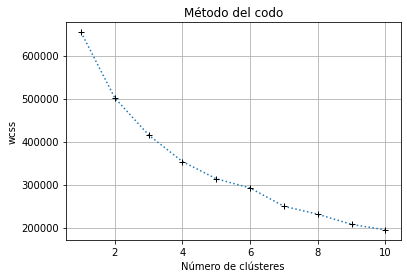

In [ ]:
#graficar
plt.grid()
plt.plot(range(1,11),wcss,marker="+",mec="black",ls=':')
plt.title("Método del codo")
plt.xlabel("Número de clústeres")
plt.ylabel("wcss")

###**Método de silueta**

In [ ]:
import sklearn.metrics as metrics

In [ ]:
puntaje_clusters=[[],[]]
for i in range(2,11):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=200).fit(clientes_norm).labels_
    puntaje_clusters[0].append(str(i))
    puntaje_clusters[1].append(metrics.silhouette_score(clientes_norm,labels,metric="euclidean",sample_size=1000,random_state=200))

In [ ]:
print(puntaje_clusters)

[['2', '3', '4', '5', '6', '7', '8', '9', '10'], [0.2682166534221818, 0.3296187103559568, 0.31760146103110254, 0.3418322209751632, 0.3700395988411523, 0.3808508133001975, 0.411018899453554, 0.4504948508557006, 0.45864725036995996]]


In [ ]:
pd.DataFrame(puntaje_clusters).transpose().rename(columns={0:"#Cluster",1:"Puntaje"})


,#Cluster,Puntaje
0,2,0.268217
1,3,0.329619
2,4,0.317601
3,5,0.341832
4,6,0.37004
5,7,0.380851
6,8,0.411019
7,9,0.450495
8,10,0.458647


Aplicando el clustering

Text(0, 0.5, 'puntaje_clusters')

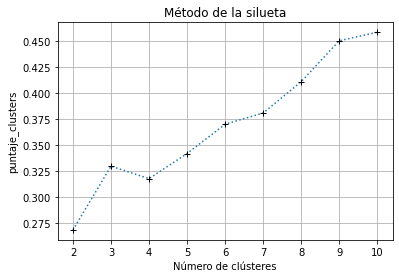

In [ ]:
#graficar
plt.grid()
plt.plot(puntaje_clusters[0],puntaje_clusters[1],marker="+",mec="black",ls=':')
plt.title("Método de la silueta")
plt.xlabel("Número de clústeres")
plt.ylabel("puntaje_clusters")

**Observación:**
El método de la silueta (el cuál mide la distancia de separación entre los clústers) *es* complementario con el método del codo debido a que ayuda a determinar el número de clústers óptimo con mayor claridad

In [ ]:
clustering=KMeans(n_clusters=3,max_iter=300)
clustering.fit(clientes_norm)
center=clustering.cluster_centers_
center

array([[ 4.30173586e-01,  7.02382961e-01,  2.48079930e-02,
         2.91681958e-02,  3.66991872e-01,  1.00000000e+00,
        -6.26165786e-14,  6.56696919e-14, -5.03340859e-17,
        -5.92970117e-13,  7.74080213e-01],
       [ 2.55353818e-01,  7.24663372e-01,  1.06298864e-02,
         2.12392743e-02,  1.98905959e-01,  1.40359946e-13,
         6.75879172e-01,  3.23968629e-01,  1.52198825e-04,
        -7.04991621e-13,  7.27161223e-01],
       [ 4.03500159e-01,  6.73858048e-01,  2.73241750e-02,
         2.30753637e-02,  3.75592648e-01, -5.13949994e-13,
         1.02001740e-13, -5.60523850e-14, -8.17556201e-17,
         1.00000000e+00,  7.83466900e-01]])

### Función para desnormalizar

In [ ]:
def desnormalizar(df,center,columns_name_list,number_of_clusters):
  #Crear listas vacías de acuerdo a la cantidad de clusters del modelo
  data_desnorm = [[] for _ in range(number_of_clusters)]

  #Ciclo para agregar los datos desnormalizados
  #Ciclo hasta que se llegue a la cantidad de clusters
  for i in range(number_of_clusters):

    #Ciclo para cada columna
    for j in range(len(columns_name_list)):

      #Aplicar fórmula para desnormalizar en cada sublista resultada en center
      formula= center[i][j]*(df[columns_name_list[j]].max()-df[columns_name_list[j]].min())+df[columns_name_list[j]].min()
      #Añadir sublista a lista de datos desnormalizados
      data_desnorm[i].append(formula)


  return np.asarray(data_desnorm)

##<font color= '##E37D0B'> **Desnormalización de los datos**

In [ ]:
#Cantidad de clusters
cluster_qty=center.shape[0]
#Nombres de las columnas
columns_name = list(clientes_norm.columns.values)

datos_desnorm=desnormalizar(data_to_norm,center,columns_name,cluster_qty)
datos_desnorm

array([[ 4.30173586e-01,  7.02382961e-01,  4.71351866e-01,
         2.22224032e+05,  3.66991872e-01,  1.00000000e+00,
        -6.26165786e-14,  6.56696919e-14, -5.03340859e-17,
        -5.92970117e-13,  7.74080213e-01],
       [ 2.55353818e-01,  7.24663372e-01,  2.01967841e-01,
         1.68910756e+05,  1.98905959e-01,  1.40359946e-13,
         6.75879172e-01,  3.23968629e-01,  1.52198825e-04,
        -7.04991621e-13,  7.27161223e-01],
       [ 4.03500159e-01,  6.73858048e-01,  5.19159325e-01,
         1.81256438e+05,  3.75592648e-01, -5.13949994e-13,
         1.02001740e-13, -5.60523850e-14, -8.17556201e-17,
         1.00000000e+00,  7.83466900e-01]])

Visualización de clusters

In [ ]:
#Ciclo para los nombres de las columnas de clusters
names=[]
for i in range(cluster_qty):
  names.append("Cluster_{}".format(i+1))

#Organizar el df
df_no_column_name =pd.DataFrame(datos_desnorm.transpose(),columns=names).abs().round(3)
column_names = pd.Series(clientes_norm.columns.values)

df_no_column_name.set_index(column_names)

,Cluster_1,Cluster_2,Cluster_3
Tiene_auto,0.430,0.255,0.404
Tiene_propiedad,0.702,0.725,0.674
Num_hijos,0.471,0.202,0.519
Ingreso_anual,222224.032,168910.756,181256.438
Genero_M,0.367,0.199,0.376
Categoria_ingresos_Commercial associate,1.000,0.000,0.000
Categoria_ingresos_Pensioner,0.000,0.676,0.000
Categoria_ingresos_State servant,0.000,0.324,0.000
Categoria_ingresos_Student,0.000,0.000,0.000
Categoria_ingresos_Working,0.000,0.000,1.000


**Descripción de los grupos**
- Grupo Comerciantes:

 El 37% son hombres, todos son asesores comerciales, menos de la mitad (43%) tienen auto, la mayoría (70%) poseen alguna propiedad,menos de la mitad (47%) tienen hijos, la mayoría  (77%) son casados y las personas de este grupo tienen ingreso anual promedio de 222224

- Grupo Adultos pensionados:    
  El 20% son hombres,más de la mitad (68%) son pensionados, el 32% son servidores de estado, el 25% tienen auto, el 72% poseen alguna propiedad, el 20% tienen hijos y el 73% son casados,con ingreso anual promedio de 168911
- Grupo Trabajadores activos:

  El 38% son hombres,todos son trabajadores, el 40% tienen auto, el 67% poseen alguna propiedad, el 52% tienen hijos y el 78% son casados,con ingreso anual promedio de 181256


## **Estrategia Comercial**
Como en el grupo Comerciantes, la mayoría de personas son asesores comerciales, tienen un promedio de ingresos alto, gran parte tienen propiedades, y son casados una posible necesidad financiera puede ser la de adquirir una cuenta corriente debido a las transacciones que como comerciantes pueden realizar en su cotidianidad, además, posiblemente les interese acceder a un crédito hipotecario para adquirir un inmueble comercial como local u oficina, como oportunidad de expansión de sus lineas comerciales.
Como este grupo es el que mayor proporción de automoviles tiene, también es importante tener en cuenta que es de gran utilidad un seguro automoviliístico contra todo riesgo.  

Para el grupo Adultos pensionados en los cuales la mayoría son pensionados, tienen ingresos promedio buenos y posiblemente tengan una edad adulta, no tienen la necesidad de hacer muchas transacciones, por lo general, lo que estas personas hacen usualmente es simplemente tener una cuenta de ahorros donde se les deposita su nomina de pensión.
A estas personas les puede interesar mucho más un certificado de depósito a término (CDT), para que sus ahorros les genere intereses mientras pasan su vejez.

En el grupo Trabajadores activos se encuentra el grupo que mayor proporción de hombres tiene con respecto a los anteriores, en donde gran parte de estos son trabajadores activos, por lo tanto tienen un nivel de ingresos muy bueno, además gran proporción posee familia y están casados.
Una buena oportunidad para este grupo puede ser la de ofrecerles un seguro de vida el cual, les dará la confianza de que al realizar trabajos que signifiquen algún tipo de peligro, puedan tener a su familia y patrimonio respaldado, además sería atractivo un credito de vacaciones familiares, posiblemente les quieran llevar a su familia de vacaciones y compartir experiencias en lugares turísticos, además de una tarjeta de crédito que puede ayudarle a sus finanzas a apalancarse debido a su respaldo que tiene con las propiedades y sus buenos ingresos.

Agregar el grupo al archivo original

In [ ]:
copy = data_to_norm.copy()
copy['KMeans_Clusters']=clustering.labels_
copy.head()
#clientes['KMeans_Clusters']=clustering.labels_
#copy[copy.Categoria_ingresos_Student==1]

,Tiene_auto,Tiene_propiedad,Num_hijos,Ingreso_anual,Genero_M,Categoria_ingresos_Commercial associate,Categoria_ingresos_Pensioner,Categoria_ingresos_State servant,Categoria_ingresos_Student,Categoria_ingresos_Working,Estado_civil_Married,KMeans_Clusters
0,1,1,0,427500.0,1,0,0,0,0,1,1,2
1,1,1,0,427500.0,1,0,0,0,0,1,1,2
2,1,1,0,112500.0,1,0,0,0,0,1,1,2
3,0,1,0,270000.0,0,1,0,0,0,0,0,0
4,0,1,0,270000.0,0,1,0,0,0,0,0,0


##<font color= '##E37D0B'>**Visualización**

In [ ]:
#PCA (Análisis de Componentes Principales)

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_credit=pca.fit_transform(clientes_norm)
pca_credit_df=pd.DataFrame(data=pca_credit,columns=['Componente1','Componente2'])
pca_add=pd.concat([pca_credit_df,copy['KMeans_Clusters']],axis=1)
pca_add.tail(10)

,Componente1,Componente2,KMeans_Clusters
438547,-0.805898,-0.309014,1
438548,0.956917,0.428742,2
438549,-0.943096,-0.484872,1
438550,-0.943096,-0.484872,1
438551,-0.943096,-0.484872,1
438552,-0.571177,0.000870,1
438553,0.173402,-0.802715,2
438554,-0.844327,0.085599,0
438555,-0.805923,-0.309133,1
438556,0.221072,-0.628247,2


Graficar

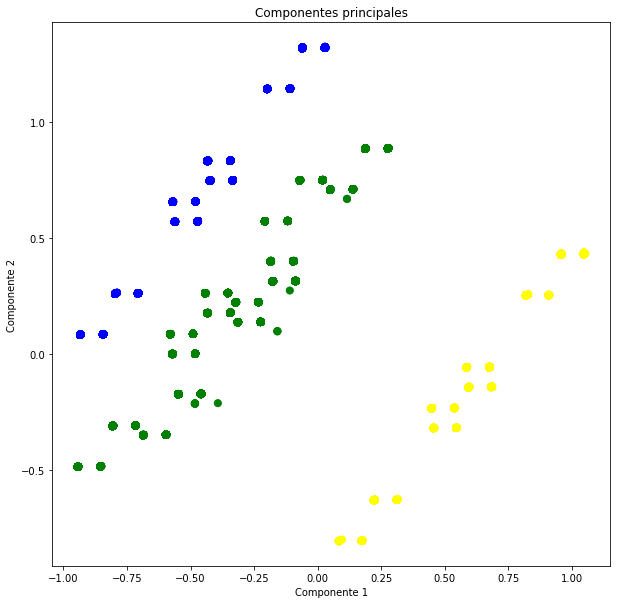

In [ ]:
grafica=plt.figure(figsize=(10,10))
graf=grafica.add_subplot(1,1,1)
graf.set_xlabel("Componente 1")
graf.set_ylabel("Componente 2")
graf.set_title("Componentes principales")

colores=np.array(["blue","green","yellow","red","black"])

graf.scatter(x=pca_add.Componente1,y=pca_add.Componente2,c=colores[pca_add.KMeans_Clusters],s=50)


In [ ]:
clientes.to_csv

<bound method NDFrame.to_csv of         IDCLIENTE Genero  Tiene_auto  Tiene_propiedad  Num_hijos  \
0         5008804      M           1                1          0   
1         5008805      M           1                1          0   
2         5008806      M           1                1          0   
3         5008808      F           0                1          0   
4         5008809      F           0                1          0   
...           ...    ...         ...              ...        ...   
438552    6840104      M           0                1          0   
438553    6840222      F           0                0          0   
438554    6841878      F           0                0          0   
438555    6842765      F           0                1          0   
438556    6842885      F           0                1          0   

        Ingreso_anual    Categoria_ingresos          Estado_civil  
0            427500.0               Working               Married  
1            42

In [ ]:
pca=PCA(n_components=3)
pca_credit=pca.fit_transform(clientes_norm)
pca_credit_df=pd.DataFrame(data=pca_credit,columns=['Componente1','Componente2','Componente3'])
pca_add=pd.concat([pca_credit_df,copy['KMeans_Clusters']],axis=1)
pca_add.head()

,Componente1,Componente2,Componente3,KMeans_Clusters
0,0.956359,0.428727,-0.422556,2
1,0.956359,0.428727,-0.422556,2
2,0.956288,0.428380,-0.422538,2
3,-0.933801,0.084477,-0.029576,0
4,-0.933801,0.084477,-0.029576,0


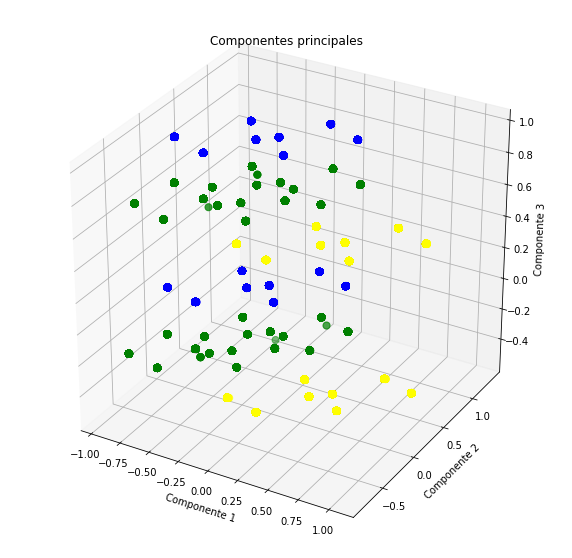

In [ ]:
grafica=plt.figure(figsize=(10,10))
graf=grafica.add_subplot(1,1,1, projection='3d')
graf.set_xlabel("Componente 1")
graf.set_ylabel("Componente 2")
graf.set_zlabel("Componente 3")
graf.set_title("Componentes principales")

colores=np.array(["blue","green","yellow","red","black"])

graf.scatter(xs=pca_add.Componente1,ys=pca_add.Componente2,zs=pca_add.Componente3,c=colores[pca_add.KMeans_Clusters],s=50)